In [4]:
####******************************************************#####################
#### Illustration of non-linear SVMs
####******************************************************#####################
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

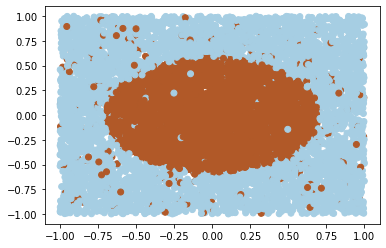

In [83]:
# load data set from HW 3, part 3:
dir = '/Users/mslawsk3/Dropbox/gmu/teaching/stat662/hw/'
###

dat = np.array(pd.read_csv(dir + "hw3_3.csv", sep=',', header=0))
#print(np.shape(dat))
X = dat[:,:-1]
#print(np.shape(X))
y = dat[:,2]
n = np.size(y)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
#X[0:4,]
#y[0:3]

In [59]:
# split data into training/test set (80% vs 20%) --- every 5th sample goes to the test set
testix = np.arange(5, n+1, 5)-1
ntest = np.size(testix)
trainix = np.setdiff1d(np.arange(n), testix)
ntrain = np.size(trainix)

Xtrain = X[trainix,:]
ytrain = y[trainix]

Xtest = X[testix,:]
ytest = y[testix]


8000

In [90]:
# fit a linear SVM and evaluate test set performance

# grid for the cost parameter
Cgrid = 10**np.arange(-3, 2, 0.5)
testerrs_lin = np.zeros(len(Cgrid))

for i in np.arange(len(Cgrid)):
    linearsvm = svm.SVC(C=Cgrid[i], kernel='linear')
    linearsvm.fit(Xtrain, ytrain)
    pred_test = linearsvm.predict(Xtest)
    testerrs_lin[i] = np.mean(pred_test != ytest)

In [94]:
# all the test errors are close to .5
testerrs_lin

array([0.4905, 0.4905, 0.4905, 0.4905, 0.4905, 0.4905, 0.4905, 0.4905,
       0.4905, 0.4905])

In [95]:
# fit a polynomial kernel SVM (degree = 2) and evaluate test set performance

# grid for the cost parameter
Cgrid = 10**np.arange(-3, 2, 0.5)
testerrs_poly = np.zeros(len(Cgrid))

for i in np.arange(len(Cgrid)):
    # note 
    polysvm = svm.SVC(C=Cgrid[i], kernel='poly', degree = 2)
    polysvm.fit(Xtrain, ytrain)
    pred_test = polysvm.predict(Xtest)
    testerrs_poly[i] = np.mean(pred_test != ytest)

In [97]:
# test erros are close to the Bayes error rate .0465.
testerrs_poly

array([0.1315, 0.09  , 0.0655, 0.0565, 0.0525, 0.0495, 0.046 , 0.0465,
       0.0465, 0.0465])

In [98]:
# fit an RBF SVM
Cgrid = 10**np.arange(-3, 2, 0.5)
testerrs_rbf = np.zeros(len(Cgrid))

for i in np.arange(len(Cgrid)):
    # note 
    rbfsvm = svm.SVC(C=Cgrid[i], kernel='rbf')
    rbfsvm.fit(Xtrain, ytrain)
    pred_test = rbfsvm.predict(Xtest)
    testerrs_rbf[i] = np.mean(pred_test != ytest)

In [99]:
# test errors are even closer to the Bayes error rate 
testerrs_rbf

array([0.045 , 0.038 , 0.0385, 0.0395, 0.0405, 0.037 , 0.036 , 0.034 ,
       0.034 , 0.035 ])